# Titanic Kaggle Competition
## To do
- check the test data to see how they compare with the training data
- check a correlation between nan and survived
- use NN to get features out of Name, Ticket, Embarked, SibSp, Parch to get information about families
- use NN to get features out of Ticket, Class, Fare, Cabin to get info about their position in the boat
- augment data with age +/-1
- feature engineer FamilySize*class

## EDA and Data Cleaning

In [150]:
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
RANDOM_STATE = 55

df = pd.read_csv("./titanic/train.csv")
df_test = pd.read_csv("./titanic/test.csv")
df["Male"] = np.where(df["Sex"] == "male", 1, 0)
df_test["Male"] = np.where(df_test["Sex"] == "male", 1, 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


### Missing Values

In [142]:
# get the number of missing data points per column
missing_values_count_train = df.isnull().sum()
missing_values_count_test = df_test.isnull().sum()

# look at the # of missing points in the first ten columns
print(pd.concat([missing_values_count_train,missing_values_count_test],axis = 1))


               0      1
PassengerId    0    0.0
Survived       0    NaN
Pclass         0    0.0
Name           0    0.0
Sex            0    0.0
Age          177   86.0
SibSp          0    0.0
Parch          0    0.0
Ticket         0    0.0
Fare           0    1.0
Cabin        687  327.0
Embarked       2    0.0
Male           0    0.0


In [143]:
print("Victims with Age missing", len(df[(df["Age"].isnull()) & (df["Survived"]==0)]), "out of", \
    len(df[df["Age"].isnull()]),"-->", len(df[(df["Age"].isnull()) & (df["Survived"]==0)])/len(df[df["Age"].isnull()])*100,"%")
print("Victims with Cabin missing",  len(df[(df["Cabin"].isnull()) & (df["Survived"]==0)]), "out of", \
    len(df[df["Cabin"].isnull()]),"-->", len(df[(df["Cabin"].isnull()) & (df["Survived"]==0)])/len(df[df["Cabin"].isnull()])*100,"%")
print("Victims with both Age and Cabin missing",len(df[(df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==0)]), "out of", \
    len(df[(df["Age"].isnull()) & (df["Cabin"].isnull())]),"-->", \
        len(df[(df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==0)])/len(df[(df["Age"].isnull()) & (df["Cabin"].isnull())])*100,"%")

Victims with Age missing 125 out of 177 --> 70.62146892655367 %
Victims with Cabin missing 481 out of 687 --> 70.01455604075691 %
Victims with both Age and Cabin missing 117 out of 158 --> 74.0506329113924 %


In [144]:
cond_A = (df["Age"].isnull()) & (df["Survived"]==0)
cond_AC = (df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==0)
cond_ACM = (df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==0) & (df["Male"]==1)
cond_ACM_Save = (df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==1) & (df["Male"]==1)
cond_ACF = (df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==0) & (df["Male"]==0)
cond_ACF_Save = (df["Age"].isnull()) & (df["Cabin"].isnull()) & (df["Survived"]==1) & (df["Male"]==0)

print("Perished women with age and cabin missing", len(df[cond_ACF])/len(df[cond_AC])*100,"%")
print("Average family size of perished women with age and cabin missing", df[cond_ACF]["SibSp"].mean())
print("Average family size of saved women with age and cabin missing", df[cond_ACF_Save]["SibSp"].mean())

Perished women with age and cabin missing 14.529914529914532 %
Average family size of perished women with age and cabin missing 2.1176470588235294
Average family size of saved women with age and cabin missing 0.3448275862068966


In [145]:
print(df[cond_ACM_Save]["SibSp"].mean(),df[cond_ACM]["SibSp"].mean())
df[cond_ACM_Save]

0.3333333333333333 0.45


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,1
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,1
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,1
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S,1
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,1
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,1
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1


#### Summary for Missing Values and Notes

- Feature missing are Age and Cabin for both training and test set
- People with both Age and Cabin missing are victim with a probability of 74% ---> Make a boolean feature
- Among them perished females were only 14.5% mostly in 3rd class and they had, on average, a larger family than saved ones ---> Make an engineered feature combining family size and class
- No evident trend was observed for males

#### Actions
- In order not to bias other Ages, set the missing values to the median, accounting for gender difference
- Set a boolean feature "MissingAgeCabin" 


In [156]:
df_ = df.copy()

#calculate the bool feature for both age and cabin missing
df_["MissingAgeCabin"] = np.where((df_["Age"].isnull()) & (df_["Cabin"].isnull()),1,0)

#calculate median
med_age_fem = df_[(df_["Male"]==0)& ~(df_["Age"].isnull())]["Age"].median()
med_age_mal = df_[(df_["Male"]==1)& ~(df_["Age"].isnull())]["Age"].median()
print("Female meadian age: ",med_age_fem, "Male median age: ",med_age_mal)


#substitute missing age
df_.loc[(df_["Male"]==0) & (df_["Age"].isnull()),"Age"] = med_age_fem
df_.loc[(df_["Male"]==1) & (df_["Age"].isnull()),"Age"] = med_age_mal

#check that there are no more empty age entries
print(df_.isnull().sum())

df_.head()

Female meadian age:  27.0 Male median age:  29.0
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Male                 0
MissingAgeCabin      0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,MissingAgeCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


## Data Augmentation

In [473]:
df_aug = df_.copy()

augmentation_age_increment = [-1,1]
for inc in augmentation_age_increment:
    df_temp = df_.copy()
    df_temp["Age"] = df_temp["Age"]+ inc
    df_aug = pd.concat([df_aug,df_temp],ignore_index=True)
    del df_temp

print(len(df_aug),len(df_))

2673 891


### Numerical Quantities

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Survived'}>]], dtype=object)

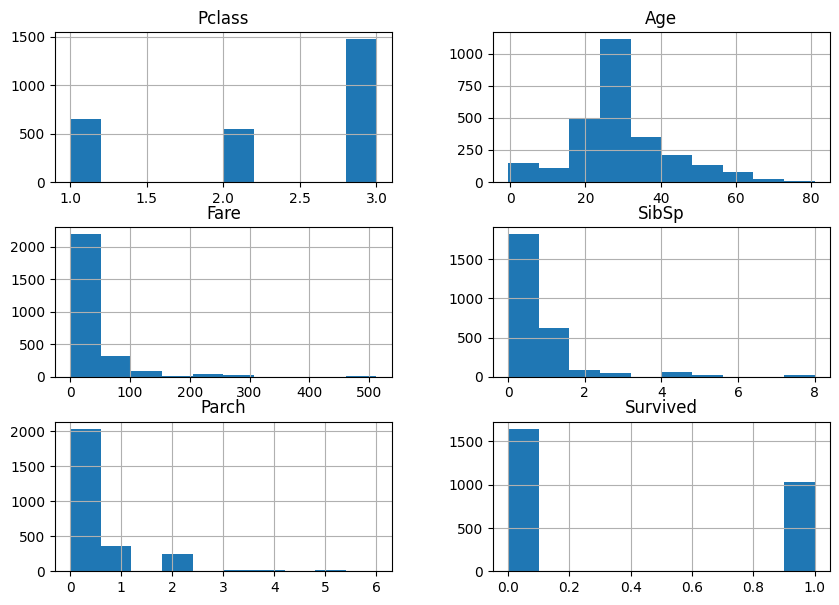

In [474]:
#devide in categorical and numerical quantity quantities
df_cat = df_aug[["Pclass","Male","MissingAgeCabin","Embarked","Survived"]].copy()
df_num = df_aug[["Pclass","Age","Fare","SibSp","Parch","Survived"]].copy()
df_num.hist(figsize=(10,7))

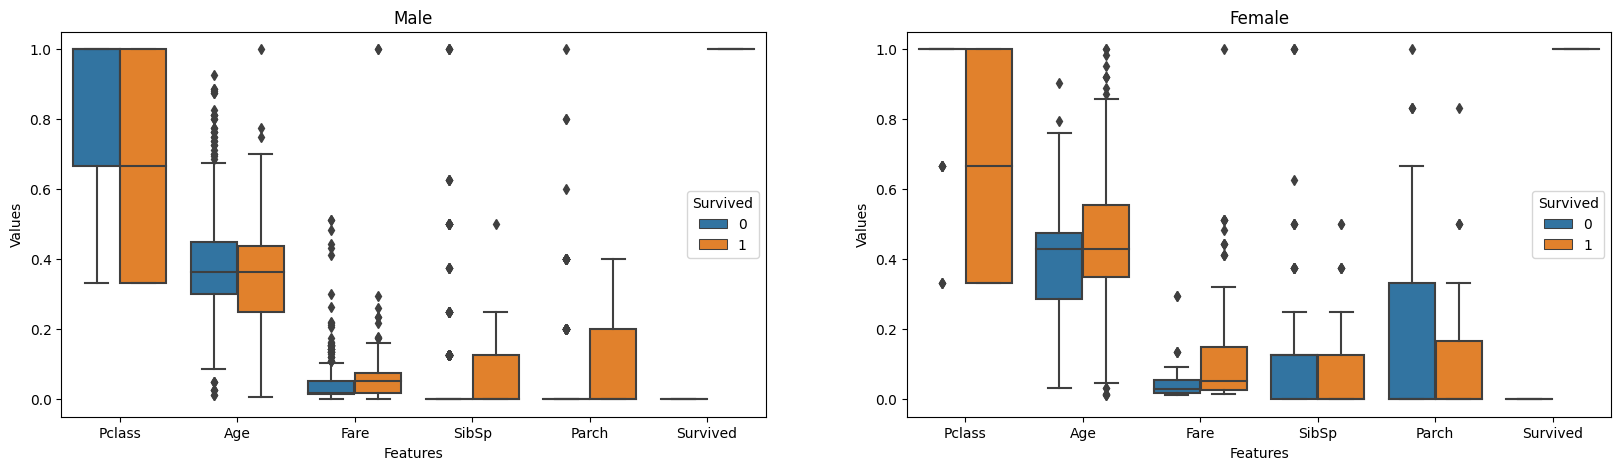

In [475]:
dataframe = df_

columns = list(df_num.columns)

def mafem_boxplot(dataframe,columns):
    conditionM = df["Male"]==1
    conditionF = df["Male"]==0
    hue_col = "Survived"
    plot_col = ["Values","Features"].append(hue_col)
    df_plotM = pd.DataFrame(columns = plot_col)
    df_plotF = pd.DataFrame(columns = plot_col)

    for col in columns:
        df_temp = pd.DataFrame()
        df_temp["Values"] = dataframe[conditionM][col].values/dataframe[conditionM][col].max()
        df_temp[hue_col] = dataframe[conditionM][hue_col].values
        df_temp["Features"] = col

        df_plotM = pd.concat([df_plotM,df_temp],ignore_index = True)
        del df_temp

    for col in columns:
        df_temp = pd.DataFrame()
        df_temp["Values"] = dataframe[conditionF][col].values/dataframe[conditionF][col].max()
        df_temp[hue_col] = dataframe[conditionF][hue_col].values
        df_temp["Features"] = col

        df_plotF = pd.concat([df_plotF,df_temp],ignore_index = True)
        del df_temp
    
    #df_plot   
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 5))
    sns.boxplot(x = "Features",y= "Values",data = df_plotM, hue = hue_col,ax = ax1)
    sns.boxplot(x = "Features",y= "Values",data = df_plotF, hue = hue_col,ax = ax2)
    ax1.set_title("Male")
    ax2.set_title("Female")
    
mafem_boxplot(dataframe,columns)

Comments
- Age is normally distributed and doesn't show a substantial criteria for survival. Generally, younger men and older women are slightly more prone to be saved
- The size of the family, (SibSp + Parch) seems to help men to get saved but, on the other hand, obstacles women

#### Feature Engineering

In [476]:
df_num_fe = df_num.copy()

#df_num_fe["SibSp"] = np.sqrt(df_num_fe["SibSp"])
#df_num_fe["FamilyMul"] = df_num_fe["SibSp"] * df_num_fe["Parch"]
df_num_fe["FamilySize"] = np.log(df_num_fe["SibSp"] + df_num_fe["Parch"]+1)
df_num_fe["FamilySizeClass"] = np.log(df_num_fe["FamilySize"]+1)+(df_num_fe["Pclass"]-1)
df_num_fe["FareClass"] = np.sqrt(np.sqrt(df_num_fe["Fare"])/df_num_fe["Pclass"]**3)
#df_num_fe["Feature1"] = np.convolve(df_num_fe["FamilySize"],df_num_fe["Age"],mode="same")

#list of engineered features
feats_eng = ["FamilySizeClass","FareClass"]
feats_del = ["SibSp","Parch"]

#normalize features
df_num_fe["FamilySize"] = df_num_fe["FamilySize"]/df_num_fe["FamilySize"].max() 
df_num_fe["FamilySizeClass"] = df_num_fe["FamilySizeClass"]/df_num_fe["FamilySizeClass"].max()
df_num_fe["FareClass"] = df_num_fe["FareClass"]/df_num_fe["FareClass"].max()
df_num_fe["SibSp"] = df_num_fe["SibSp"]/df_num_fe["SibSp"].max()
df_num_fe["Parch"] = df_num_fe["Parch"]/df_num_fe["Parch"].max()
df_num_fe["Age"] = df_num_fe["Age"]/df_num_fe["Age"].max()


#plot
columns = list(df_num.columns)+feats_eng
mafem_boxplot(df_num_fe,columns)

/tmp/ipykernel_8053/1898058529.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp["Values"] = dataframe[conditionM][col].values/dataframe[conditionM][col].max()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

The engineered features 

- FamilySizeClass =  log(SibSp+Parch+1)+(Pclass-1)
- FareClass = sqrt(sqrt(Fare)/Pclass³)

Seem to help differentiating more female victims/survivals than male

In [477]:
df_num_fe = df_num_fe.drop(["FamilySize","Survived"],axis=1)
df_num_fe.head()

,Pclass,Age,Fare,SibSp,Parch,FamilySizeClass,FareClass
0,3,0.271605,7.2500,0.125,0.0,0.783887,0.066377
1,1,0.469136,71.2833,0.125,0.0,0.163377,0.610745
2,3,0.320988,7.9250,0.000,0.0,0.620510,0.067870
3,1,0.432099,53.1000,0.125,0.0,0.163377,0.567396
4,3,0.432099,8.0500,0.000,0.0,0.620510,0.068136


### Categorical data
- Pclass
- Male
- MissingAgeCabin
- Embarked

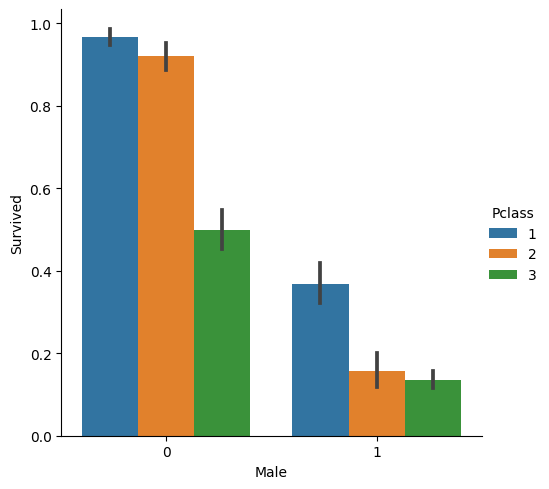

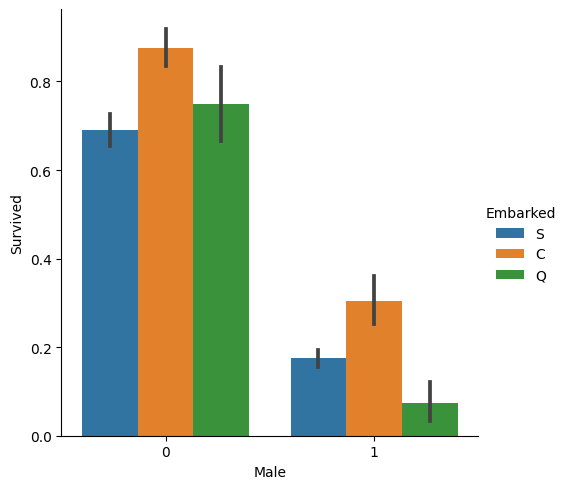

In [478]:
sns.catplot(data=df_cat, x="Male",y="Survived", hue="Pclass", kind = "bar")
sns.catplot(data=df_cat, x="Male",y="Survived", hue="Embarked", kind = "bar")   
#sns.boxplot(data= df_, x="Embarked",y="Fare")

#### Hot-Spot Encoding

Since the Embark feature seem to play a role for men, we will use hot-encoding

In [431]:
df_cat_hs = df_cat.copy()
df_hs = pd.get_dummies(df_cat["Embarked"],dtype=int)
columns_hs = list(df_hs.columns)
df_cat_hs = pd.concat([df_cat_hs,df_hs],axis = 1, join="inner").drop(["Embarked","Survived"],axis=1)
df_cat_hs.head()

,Pclass,Male,MissingAgeCabin,C,Q,S
0,3,1,0,0,0,1
1,1,0,0,1,0,0
2,3,0,0,0,0,1
3,1,0,0,0,0,1
4,3,1,0,0,0,1


### Passenger Info
- Sex: man double than women
- Mostly solo travelers or couples
- The majority of the people were in 3rd class (50%) and 25% in 1st and 25% in 2nd roughly
- The victims were 2x the survivors
- Age: the oldest woman is 65 while the oldest man is 80. Kids, no big difference between M or F, in the range 18-50 M double 

### Higher chance to survive
- Sex: if women
- Fare: if higher, the more you pay the more chance you get a lifeboat
- Pclass: higher, many members of the low class were locked inside and didn't have access to a lifeboat
- SibSp: 1 or 2, single travelers and couples could easily find pace in a lifeboat, people with many kids didn't want to leave them (check correlation #family size/class)
- Age: very old and very young, can be used as a correction factor to engineer a feature


# Models

### Linear Classification

In [518]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

df_train = pd.concat([df_num_fe,df_cat_hs],axis = 1, join="inner")

features_sel = ["Age","FamilySizeClass","FareClass","Male"]
X_train, X_val, y_train, y_val = train_test_split(df_train[features_sel], df_["Survived"], train_size = 0.80, random_state = RANDOM_STATE)


#poly = PolynomialFeatures(degree=2)
#poly.fit_transform(X_train)

# Polynomial model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LogisticRegression(fit_intercept=False,max_iter=1000))])
poly_model.fit(X_train, y_train)

# Linear Classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Adam Boost CLassifier
cla = AdaBoostClassifier(n_estimators=60)
cla = cla.fit(X_train, y_train)

# Random Forest
clrf = RandomForestClassifier(n_estimators=60)
clrf = clrf.fit(X_train, y_train)

importances = clrf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clrf.estimators_], axis=0)

# Gradient Boosting
clf_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=RANDOM_STATE)
clf = clf_model.fit(X_train, y_train)

#Accuracies
print(f"Accuracy Adam  Boosting Classifier {cla.score(X_val, y_val)}")
print(f"Accuracy Gradient Random Forest {clrf.score(X_val, y_val)}")
print(f"Accuracy Gradient Boosting Classifier {clf.score(X_val, y_val)}")
print(f"Accuracy Logistic Linear Regression {lr_model.score(X_val, y_val)}")
print(f"Polynomial Regression {poly_model.score(X_val, y_val)}")

#forest_importances = pd.Series(importances, index=features_sel)

#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

Accuracy Adam  Boosting Classifier 0.8100558659217877
Accuracy Gradient Random Forest 0.8100558659217877
Accuracy Gradient Boosting Classifier 0.7932960893854749
Accuracy Logistic Linear Regression 0.776536312849162
Polynomial Regression 0.7821229050279329


In [526]:
y_pred = clf.predict(X_train)
y_pred2 = clf.predict(X_val)
#df_train[y_pred!=y_train]

df_wrong = df_[list(y_pred!=y_train) +list(y_pred2!=y_val)]
df_wrong

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male,MissingAgeCabin
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,27.0,0,0,330959,7.8792,NaN,Q,0,1
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,0,0
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,1,0
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,27.0,0,1,113505,55.0000,E33,S,0,0
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,27.0,0,0,370370,7.7500,NaN,Q,0,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,1,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0,0
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C,0,0
568,569,0,3,"Doharr, Mr. Tannous",male,29.0,0,0,2686,7.2292,NaN,C,1,0
